## Pandas Lab Setup

### Setup

In [ ]:
# Widget Setup
# You don't have to look at this code! Just run it

from ipywidgets import widgets, Layout, Box, GridspecLayout

def create_multipleChoice_widget(description, options, correct_answer, hint):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False,
        indent = False,
        align = 'center',
    )
    
    description_out = widgets.Output(layout=Layout(width='auto'))
    
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = '\x1b[6;30;42m' + "correct" + '\x1b[0m' +"\n"
        else:
            s = '\x1b[5;30;41m' + "try again" + '\x1b[0m' +"\n"
        with feedback_out:
            feedback_out.clear_output()
            print(s)
        return
    
    check = widgets.Button(description="check")
    check.on_click(check_selection)
    
    hint_out = widgets.Output()
    
    def hint_selection(b):
        with hint_out:
            print(hint)
            
        with feedback_out:
            feedback_out.clear_output()
            print(hint)
    
    hintbutton = widgets.Button(description="hint")
    hintbutton.on_click(hint_selection)
    
    return widgets.VBox([description_out, 
                         alternativ, 
                         widgets.HBox([hintbutton, check]), feedback_out], 
                        layout=Layout(display='flex',
                                     flex_flow='column',
                                     align_items='stretch',
                                     width='auto'))

#Exercises
exercise_1 = create_multipleChoice_widget(
    'What is the correct order here: 1 , "One", ["I","Get","Datatypes"], True',
    ["str, str, dict, bool","int, str, list, str",
    "int, str, list, bool","int, str, dict, int"],
    "int, str, list, bool","If you're having trouble - look back over the examples above!")

exercise_2 = create_multipleChoice_widget(
    'hypothetically what might you use to import a table from a webpage and export to an excel file?',
    ["read_html, to_csv","read_json, to_hdf5", "read_html, to_xls","read_json, to_sql"],
    "read_html, to_xls","try googling the terms in the diagram that you aren't familiar with!")

exercise_3 = create_multipleChoice_widget(
    'What changed here?',
    ["Nothing these two dataframes are the same","Now sorting by sum of RT and MC", "The movie Leviathan moved up to 3rd","I have no idea"],
    "The movie Leviathan moved up to 3rd","No hints! you got this")




## Part 1: Review of Datatypes

### Keeping track of datatypes will be important in this lab so lets review what we've covered.
##### Take a couple minutes to look over each of these

In [ ]:
# Integers
type(1), type(5), type(434892)

In [ ]:
# Floats
type(1.5), type(3.3333), type(-1.0)

In [ ]:
# Strings
type("Hello"), type("100"), type("😊"), type("")

In [ ]:
# Booleans
type(True), type(False), type(1==1), type(""!=int)

In [ ]:
# Nonetypes
type(None)

In [ ]:
# Lists
type([1,2]), type(["Hello","World"]), type(["1",1,"2",2])

In [ ]:
# Dictionaries
type({"first_word":"meaning","second_word":"different_meaning"}), type({"One":1,"Two":2})

#### Exercise

In [115]:
exercise_1

## Part 2: Python Libraries

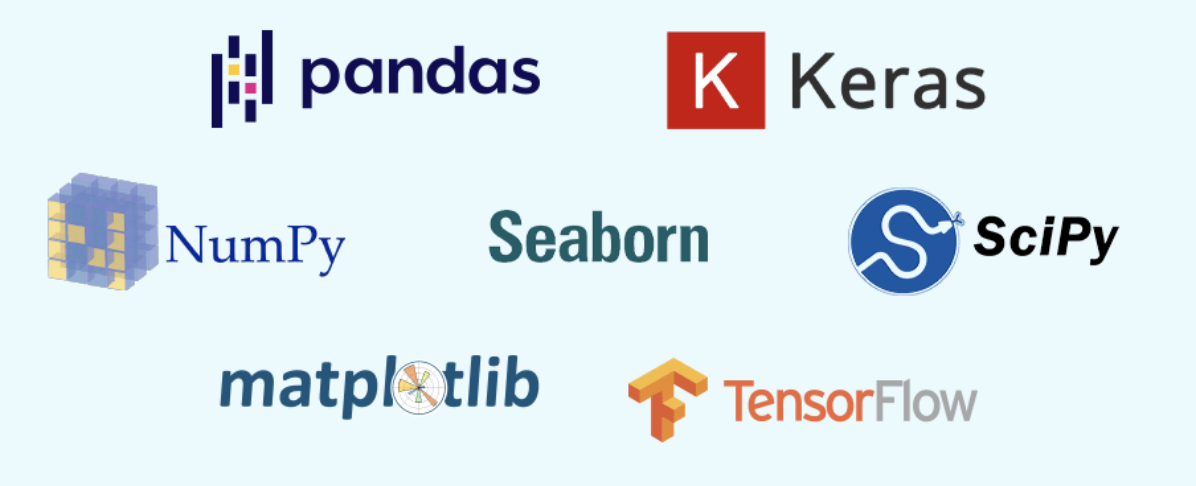

What are Python libraries?

A Python Library is a set of useful functions that eliminate the need for writing codes from scratch.

There are over 137,000 python libraries and these libraries play a vital role in the development of web apps, machine learning, data science, data visualization, image and data manipulation applications and more.

**Research Activity** - There is a convenient list of popular python libraries here https://github.com/vinta/awesome-python. Take the next 10 minutes to explore and pick a library that you will share with the class. At the end of the 10 minutes everyone will take 15-20 seconds to share what library they picked and...
    - what category it's in
    - what it's used for
    - why you picked it

## Part 3: Pandas

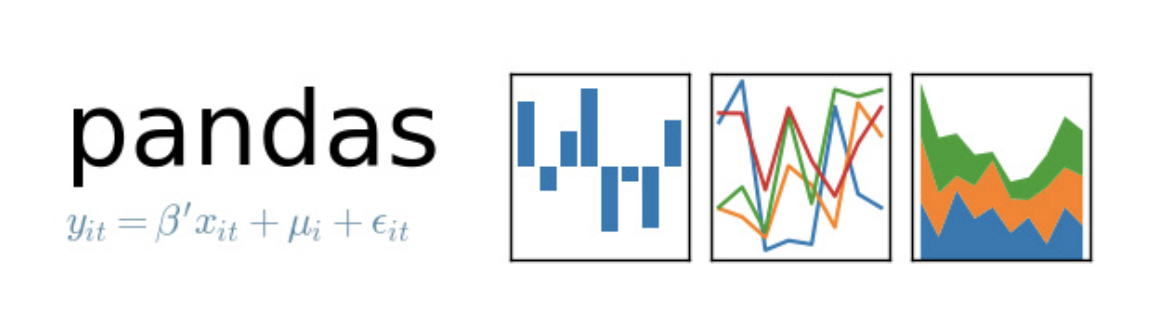

Okay, Now that we have an idea of what Python Libraries are. Lets take a closer look at a particularly useful one.

This is the **Pandas Library**.

It's a fast, powerful, flexible library used for data analysis and manipulation.

In [ ]:
#Start by importing pandas
import pandas as pd

### The DataFrame

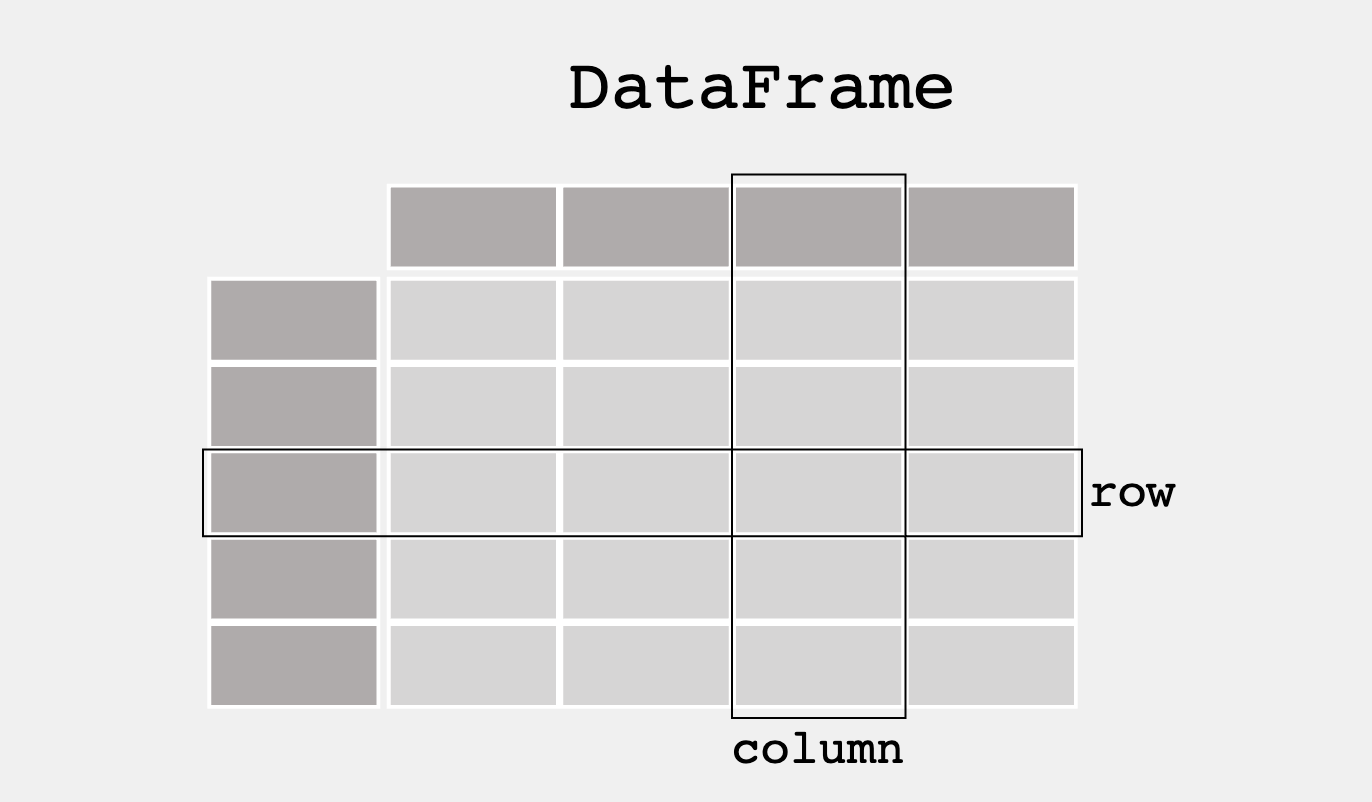

Pandas is built around a data structure called a "Dataframe". Its basically just table.

In [ ]:
#Pandas defines its DataFrame variable as a dictionary of lists...

dataframe_1 = pd.DataFrame(
    {"Column 1": ["Cell 1", "Cell 3"],
     "Column 2": ["Cell 2", "Cell 4"]
     }
)
dataframe_1

In [ ]:
#... or a list of dictionaires

dataframe_2 = pd.DataFrame([
    {"Column 1": "Cell 1", "Column 2": "Cell 2",
     "Column 3": "Cell 3"},
    {"Column 1": "Cell 4", "Column 2": "Cell 5", "Column 3": "Cell 6"},
])
dataframe_2

#### Exercise

Based on the previous two cells - define and display a Pandas Dataframe that looks like this 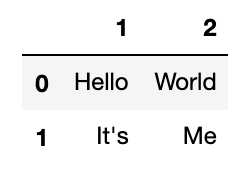

In [ ]:
#Write your code here:



### Importing

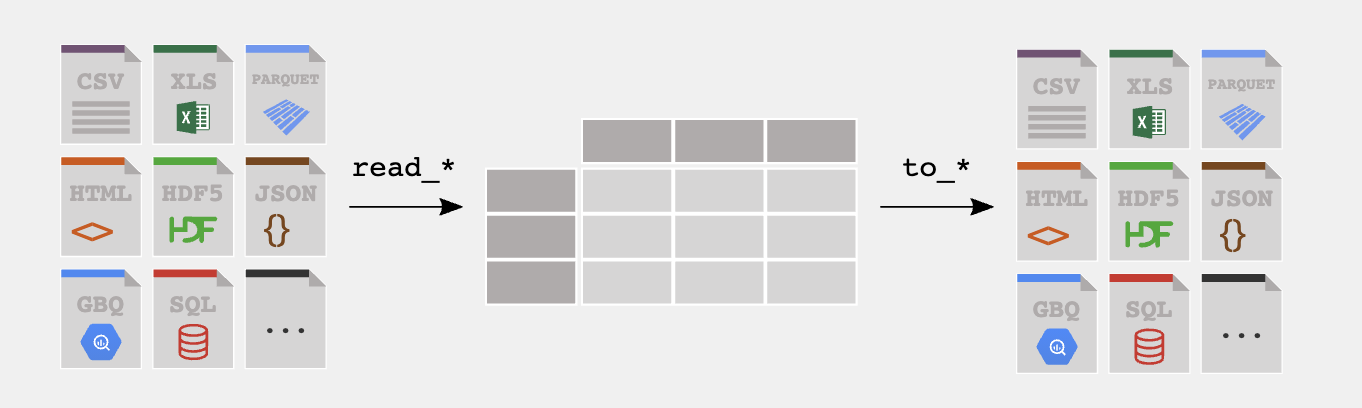

In [ ]:
# The Pandas "read_csv" function takes a path input and returns a Pandas Dataframe.
# Why is the does the path have "data_files/" before the name of the file?

movie_path = "data_files/movie_scores.csv"
movie_df = pd.read_csv(movie_path)

# To display only the first 5 rows lets use the pandas function ".head('int')"
movie_df.head()

In [ ]:
exercise_2

### Choosing columns

In [ ]:
# To look at specific columns we use the the syntax: dataframe[["column_1","column_2","column_n"]]

RT_rating_only = movie_df[["FILM","RottenTomatoes"]]
RT_rating_only.head(5)

#### Exercise: Create a dataframe that looks like this 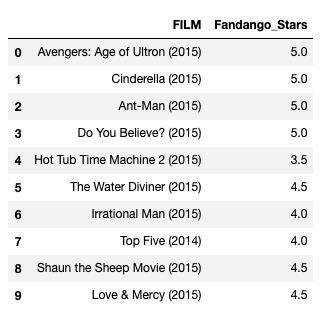

In [ ]:
# Write your code here




### Exporting

In [ ]:
# To export use the "to_csv" function on a Dataframe and specify what the file should be named as an input
RT_rating_only.to_csv(r'rotten_data.csv')

# Now check your directory! Is there a new file?

### Filtering

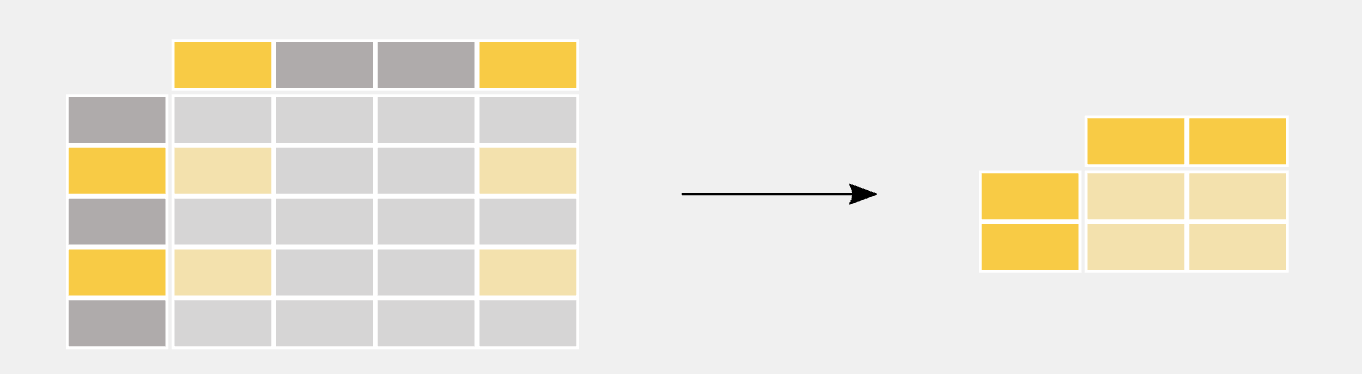

In [ ]:
#To filter we use the loc and iloc functions
#Lets start by setting the "FILM" column as our index

movie_df = movie_df.set_index("FILM")
movie_df.head()

In [ ]:
#Now we can grab specific values with this syntax --- for loc
movie_df.loc["Ant-Man (2015)", "Metacritic"]

In [ ]:
movie_df.loc["Do You Believe? (2015)", "Fandango_Stars"]

In [ ]:
#or this syntax --- for iloc
movie_df.iloc[0, 0]

In [ ]:
movie_df.iloc[1, 0]

In [ ]:
movie_df.iloc[0, 1]

#### Exercise: Find the Rotten Tomatoes score for "Top Five (2014)" using iloc

In [ ]:
# Write your code here




In [ ]:
# To go one step further we can add conditionals to loc and iloc operations using this syntax
movie_df.loc[(movie_df["RottenTomatoes"] == 100)]


In [ ]:
# or multiple conditionals using this syntax for "or"

movie_df.loc[(movie_df["RottenTomatoes"] == 100) | (
    movie_df["Metacritic"] == 94),:]

In [ ]:
#and this syntax for "and"

movie_df.loc[(movie_df["RottenTomatoes"] == 100)].loc[(movie_df["Metacritic"] == 90)]

#### Exercise: Output a list of movies that got greater than 98 on Rotten Tomatoes and greater than 90 on Metacritic

In [ ]:
#Write your code here:




### Sort

In [ ]:
# To sort we use "sort_values()" with the column name as input

movie_df.sort_values("RottenTomatoes").head()

In [ ]:
# To sort in descending order add this

movie_df.sort_values("RottenTomatoes", ascending=False).head(10)

In [ ]:
# We can also sort by multiple columns

movie_df.sort_values(["RottenTomatoes", "Metacritic"], ascending=False).head(10)

In [ ]:
exercise_3

### Summary Functions (Max, Min, Mean, Count, Sum)

In [ ]:
# These are pretty straight forward - take a look and be ready to use them in Part 4

#.max() will give you the maximum value in a column
movie_df["RottenTomatoes"].max()

In [ ]:
#.min() will give you the minimum value in a column
movie_df["RottenTomatoes"].min()

In [ ]:
movie_df["RottenTomatoes"].mean()

In [ ]:
#.count() will give you the number of cells in a column
movie_df["RottenTomatoes"].count()

In [ ]:
#.sum() will give you the number of cells in a column
movie_df["RottenTomatoes"].sum()

In [ ]:
#These functions can be chained to things that you already know!
#Examples:

movie_df.loc[(movie_df["RottenTomatoes"] < 80)].loc[(movie_df["Fandango_Stars"] < 4)]["Metacritic"].max()



#### Exercise: What is the mean Rotten Tomatoes score for movies with a Metacritic score of over 85?

In [ ]:
#Write your code here:




## Part 4: Pokemon Dataset

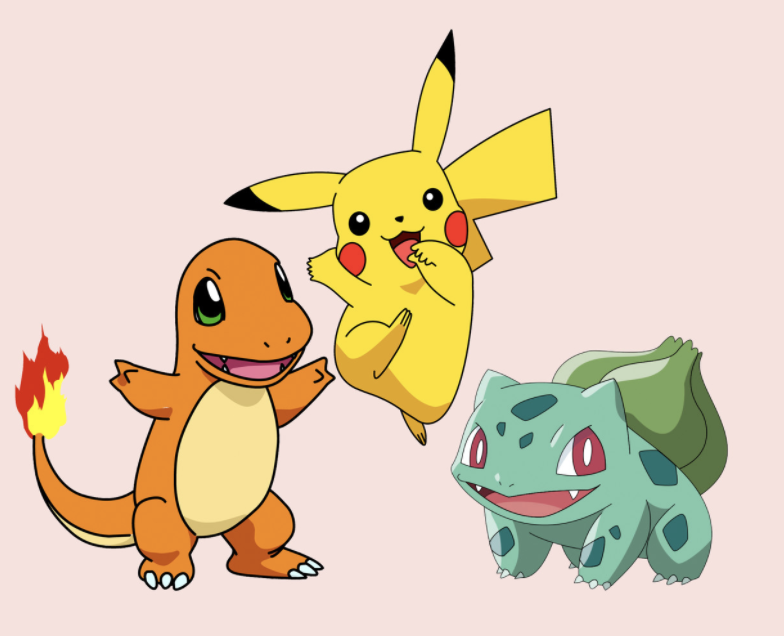

You made it!

We've now covered all of the Pandas skills that you'll be learning today so its time to practice.

And what better way...

than with an awesome Pokemon dataset.

In [ ]:
# Start by filling in the path to the Pokemon data file
pokemon = ""

In [114]:
# Now read the file with pd.read_csv(path)
pokemon_df = 
pokemon_df.head()

SyntaxError: invalid syntax (<ipython-input-114-490cbbc47a42>, line 2)

**Question 1**: Create a new dataframe with only the following columns - "Name, Type 1, Type 2, Total"

In [ ]:
# Write your code here



**Question 2**: What Pokemon has the greatest total?

In [ ]:
# Write your code here



**Question 3**: Go back to the dataset with all columns. What are the top 5 most powerful legendary pokemon?

In [ ]:
# Write your code here

**Question 4**: List the five Generation 6 Pokemon that have the least HP.

In [ ]:
# Write your code here



**Question 5**: How many Type 1 "Normal" Pokemon become Type 2 "Flying"?

In [ ]:
# Write your code here



**Question 6**: Use your own logic/preferences to create a deck of 5 pokemon. You can only have 1 Legendary, you have to have at least 3 Types, and the sum of your generations can't be greater than 16.

In [ ]:
# Write your code here

